In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.shape

(200, 5)

In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [25]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
df.rename(columns = {'Age':'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'},inplace = True)

In [27]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [28]:
df.shape

(200, 3)

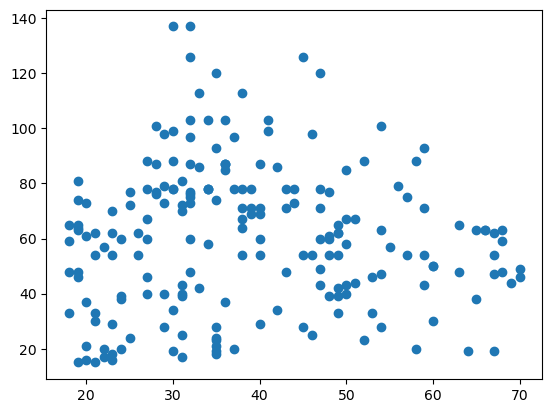

In [29]:
plt.scatter(df.age, df.income)

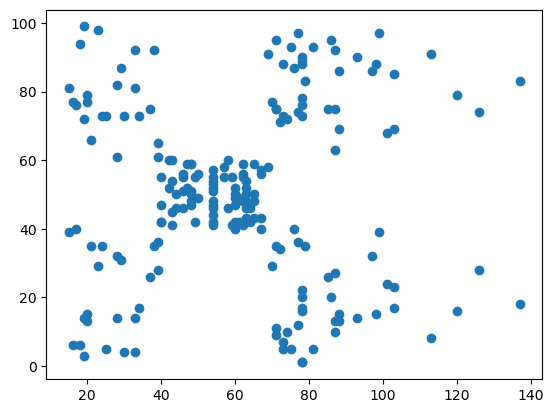

In [30]:
plt.scatter(df.income, df.score)

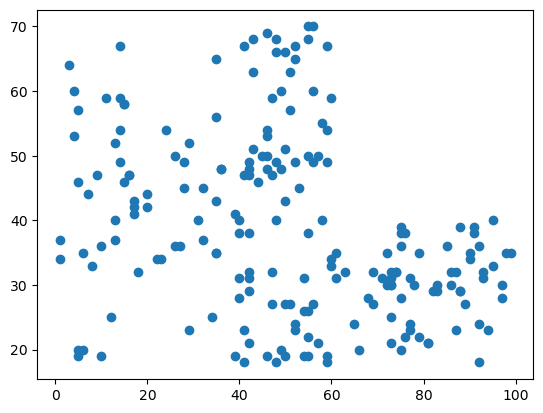

In [31]:
plt.scatter(df.score, df.age)  

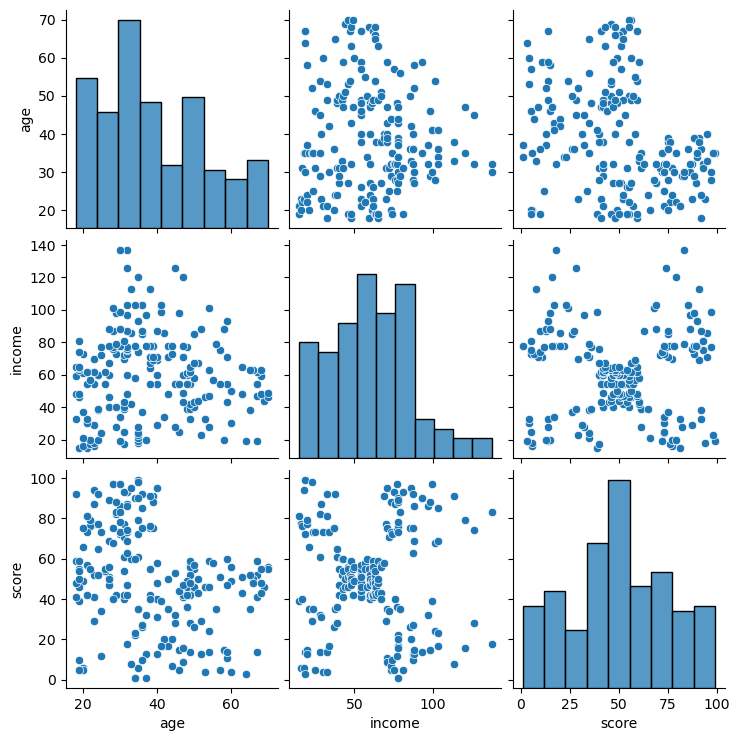

In [32]:
sns.pairplot(df[['age', 'income', 'score']])
plt.savefig('image.png')

K-Means Cluster

Text(0, 0.5, 'income in $1000')

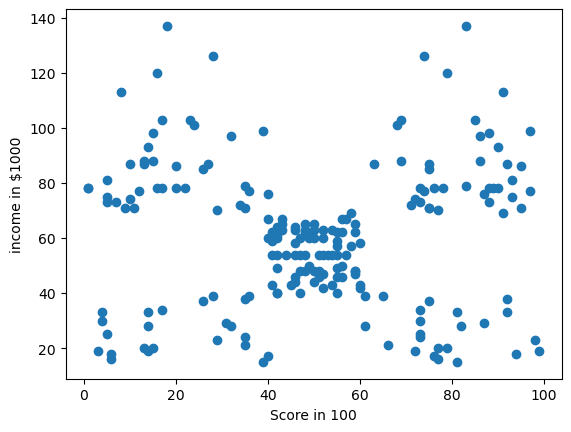

In [33]:
plt.scatter(df.score, df.income)
plt.xlabel('Score in 100')
plt.ylabel('income in $1000')

In [34]:
from sklearn.cluster import KMeans

In [35]:
clust = KMeans()

In [36]:
clust.fit(df[['score', 'income']])

KMeans()

In [37]:
clust.predict(df[['score', 'income']])  # k value ta kon cluster a acay seta.

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 1, 5, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7, 4, 6, 4, 6, 4,
       7, 4, 6, 4, 6, 4, 6, 4, 6, 4, 7, 4, 6, 4, 7, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 4, 7, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [38]:
df['defclusters'] = clust.predict(df[['score', 'income']])

In [39]:
df.head()

,age,income,score,defclusters
0,19,15,39,3
1,21,15,81,5
2,20,16,6,3
3,23,16,77,5
4,31,17,40,3


In [42]:
centroid = clust.cluster_centers_
centroid

array([[ 22.        , 109.7       ],
       [ 50.82978723,  47.72340426],
       [ 82.72727273, 108.18181818],
       [ 19.52380952,  25.14285714],
       [ 81.89285714,  78.03571429],
       [ 80.04761905,  25.0952381 ],
       [ 12.68181818,  80.18181818],
       [ 46.45      ,  64.45      ]])

In [54]:
df0 = df[df.defclusters==0]
df1 = df[df.defclusters==1] 
df2 = df[df.defclusters==2]  
df3 = df[df.defclusters==3]   
df4 = df[df.defclusters==4]    
df5 = df[df.defclusters==5]     
df6 = df[df.defclusters==6]      
df7 = df[df.defclusters==7]      

In [58]:
df0.head()

,age,income,score,defclusters
180,37,97,32,0
182,46,98,15,0
184,41,99,39,0
186,54,101,24,0
188,41,103,17,0


In [60]:
df1.shape

(47, 4)

In [61]:
df4.shape

(28, 4)

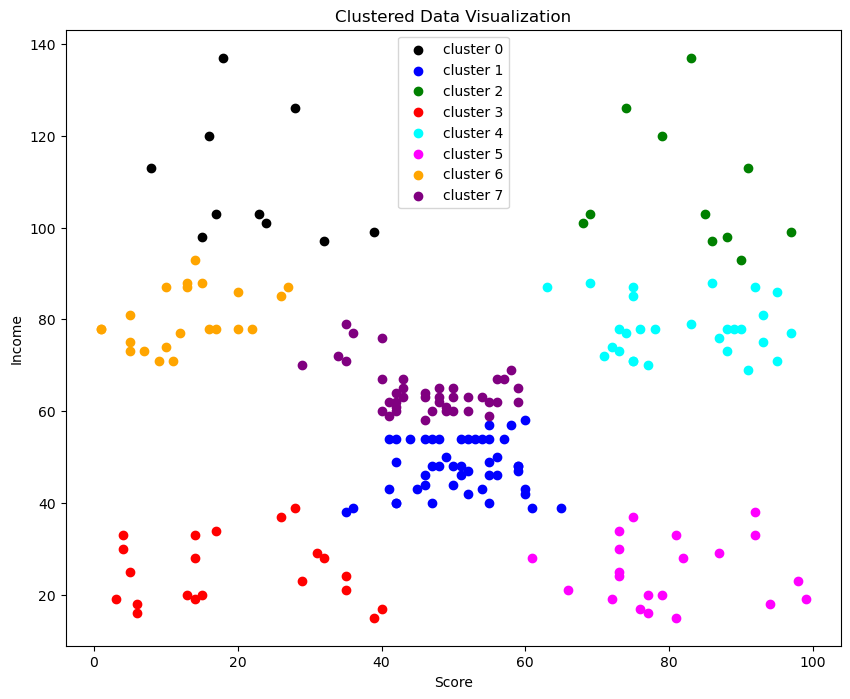

In [64]:
plt.figure(figsize=(10, 8))

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='red', label='cluster 3')
plt.scatter(df4.score, df4.income, color='cyan', label='cluster 4')
plt.scatter(df5.score, df5.income, color='magenta', label='cluster 5')
plt.scatter(df6.score, df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score, df7.income, color='purple', label='cluster 7')


plt.xlabel('Score')
plt.ylabel('Income')
plt.title('Clustered Data Visualization')
plt.legend()
plt.show()

Objective functions

In [65]:
wcss = []
cluster = range(1, 30)

for k in cluster:
    clst = KMeans(n_clusters=k)
    clst.fit(df[['score', 'income']])
    wcss.append(clst.inertia_)  #inertia calculate by wcss value. 

In [66]:
wcss

[269981.28,
 184609.9843409062,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38788.45862332112,
 32277.023173884936,
 30329.607434143873,
 21826.936303231654,
 19704.123543147773,
 18805.902251281746,
 17947.91709192768,
 16730.393493945667,
 13804.183367399863,
 12174.086366574604,
 11618.579022595675,
 10159.91048951049,
 10546.15283882784,
 9300.610791985793,
 8199.404551259724,
 8131.464450284015,
 7819.0714285714275,
 7734.007502000923,
 7171.722794603059,
 6346.381509013862,
 6906.3056738280875,
 6534.351578246316,
 5323.973318348319,
 5238.561755727933]

Text(0, 0.5, 'Number of cluster')

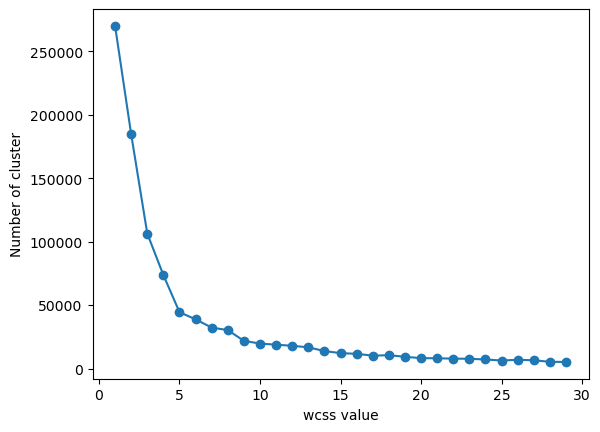

In [67]:
plt.plot(range(1, 30), wcss, marker='o')

plt.xlabel('wcss value')
plt.ylabel('Number of cluster')

In [71]:
!pip install kneed
from kneed import KneeLocator as kn 

In [72]:
kl = kn(cluster, wcss, direction='decreasing', curve='convex')

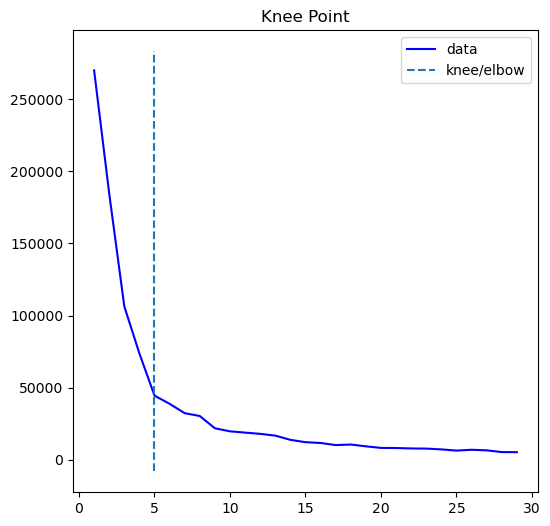

In [73]:
kl.plot_knee()
plt.show()

In [74]:
kl.knee

5

After optimizing K-Means cluster

In [75]:
km = KMeans(n_clusters=5)
df['defclusters'] = km.fit_predict(df[['score', 'income']])

In [76]:
df.head()

,age,income,score,defclusters
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


again separate kora lagbay.

In [77]:
centrod = km.cluster_centers_

In [78]:
centrod

array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])